# Partie 1 : Exploration et Prétraitement des Donnée

1. Chargement et Inspection Initiale :

Chargez le fichier credit_data.csv dans un DataFrame Pandas.
Affichez les 5 premières lignes du DataFrame.
Obtenez un résumé des informations sur le DataFrame (types de données, valeurs non nulles, etc.) et une description statistique des colonnes numériques et catégorielles.
Identifiez et comptez le nombre de valeurs manquantes pour chaque colonne.

In [ ]:
import pandas as pd
# Lire le fichier csv
df=pd.read_csv("/content/data/credit_data.csv")

In [ ]:
#Afficher les 5 premiers ligne du dataframe
df.head()

,ID_Client,Age,Revenu_Mensuel,Dette_Actuelle,Anciennete_Client_Mois,Type_Contrat_Pret,Statut_Emploi,Nb_Credits_Actifs,Taux_Interet_Moyen_Credits,Historique_Paiement,Ville,Defaut_Paiement
0,1,56,3420.0,41297.0,106.0,Consommation,Sans Emploi,0,0.041373,Excellent,Nice,0
1,2,69,9317.0,27684.0,100.0,Consommation,salarié,4,0.097556,Excellent,Marseille,0
2,3,46,13183.0,26393.0,92.0,Immobilier,Freelance,0,0.121410,Bon,Toulouse,0
3,4,32,12836.0,22754.0,190.0,Consommation,Freelance,5,0.124343,Mauvais,Marseille,0
4,5,60,3593.0,20799.0,96.0,Immobilier,salarié,2,0.047759,Bon,Bordeaux,1


In [ ]:
#comprendre la taille du dataframe
df.shape

(5000, 12)

In [ ]:
#Afficher le type de donnée de chaque colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_Client                   5000 non-null   int64  
 1   Age                         5000 non-null   int64  
 2   Revenu_Mensuel              4900 non-null   float64
 3   Dette_Actuelle              4900 non-null   float64
 4   Anciennete_Client_Mois      4900 non-null   float64
 5   Type_Contrat_Pret           5000 non-null   object 
 6   Statut_Emploi               5000 non-null   object 
 7   Nb_Credits_Actifs           5000 non-null   int64  
 8   Taux_Interet_Moyen_Credits  5000 non-null   float64
 9   Historique_Paiement         5000 non-null   object 
 10  Ville                       5000 non-null   object 
 11  Defaut_Paiement             5000 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 468.9+ KB


In [ ]:
#Afficher les statstiques des dataframe
df.describe()

,ID_Client,Age,Revenu_Mensuel,Dette_Actuelle,Anciennete_Client_Mois,Nb_Credits_Actifs,Taux_Interet_Moyen_Credits,Defaut_Paiement
count,5000.000000,5000.000000,4900.000000,4900.000000,4900.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,43.584600,8212.142653,24923.554082,120.554694,2.520000,0.088977,0.154400
std,1443.520003,14.919094,3924.938152,14505.469130,68.104647,1.695339,0.034264,0.361368
min,1.000000,18.000000,1501.000000,2.000000,6.000000,0.000000,0.030013,0.000000
25%,1250.750000,31.000000,4790.750000,12375.750000,60.000000,1.000000,0.059408,0.000000
50%,2500.500000,43.000000,8195.500000,24795.500000,119.000000,3.000000,0.088944,0.000000
75%,3750.250000,56.000000,11648.750000,37317.000000,180.000000,4.000000,0.118223,0.000000
max,5000.000000,69.000000,14999.000000,49997.000000,239.000000,5.000000,0.149968,1.000000


In [ ]:
#afficher les valeur manquante
df.isna().sum()

,0
ID_Client,0
Age,0
Revenu_Mensuel,100
Dette_Actuelle,100
Anciennete_Client_Mois,100
Type_Contrat_Pret,0
Statut_Emploi,0
Nb_Credits_Actifs,0
Taux_Interet_Moyen_Credits,0
Historique_Paiement,0


2. Gestion des Valeurs Manquantes :

Avec descibe() et l'inspection statistique, on remarque des valeurs extrèmes donc le mieux est d'imputer ses *colonnes* avec la mediane

In [ ]:
#Définir les colonnes imputer
valeur_nan=['Revenu_Mensuel','Dette_Actuelle',"Anciennete_Client_Mois"]
#boucler et remplacer les valeur manqunates par la median
for colonne in valeur_nan :
  df[colonne]=df[colonne].fillna(df[colonne].median())

In [ ]:
# Inspecter le changement
df.isna().sum()

,0
ID_Client,0
Age,0
Revenu_Mensuel,0
Dette_Actuelle,0
Anciennete_Client_Mois,0
Type_Contrat_Pret,0
Statut_Emploi,0
Nb_Credits_Actifs,0
Taux_Interet_Moyen_Credits,0
Historique_Paiement,0


3. Changement et Conversion de Types :

Assurez-vous que toutes les colonnes numériques sont bien au format numérique (par exemple, int64 ou float64).
Convertissez les colonnes catégorielles ('Type_Contrat_Pret', 'Statut_Emploi', 'Historique_Paiement', 'Ville') en type category de Pandas. Expliquez pourquoi cette conversion est bénéfique.

In [ ]:
#Convertisser les colonne categorielle type objet e type category
#col_cat=['Type_Contrat_Pret', 'Statut_Emploi', 'Historique_Paiement', 'Ville']
#for col in col_cat:
  #df[colonne]= df[colonne].astype("category")

C'est crucial pour des datasets volumineux.et pour
Améliorer  des Performances : De nombreuses bibliothèques de Machine Learning (comme Scikit-learn) et de visualisation (comme Seaborn ou Plotly) reconnaissent le type category et peuvent adapter leur comportement en conséquence (par exemple, pour l'encodage One-Hot, ou pour la création automatique de légendes

4. Application de Fonctions (.apply() et .map()) :

Créez une nouvelle colonne 'Categorie_Age' à partir de la colonne 'Age'. Utilisez la méthode .apply() avec une fonction Python pour classer les âges en 'Jeune' (< 25 ans), 'Adulte' (25-44 ans) et 'Senior' (45 ans et plus). Convertissez cette nouvelle colonne en type category.
Créez une nouvelle colonne 'Score_Historique_Paiement' en mappant les valeurs textuelles de 'Historique_Paiement' ('Excellent', 'Bon', 'Moyen', 'Mauvais') à des scores numériques (par exemple, 4, 3, 2, 1). Utilisez la méthode .map() pour cela.

In [ ]:
#Créer une fonction pour classer client en fonction de l'âge
def classe(age):
  if age < 25:
    return "jeune"
  elif 25 < age < 44:
    return "Adulte"
  elif 45 <= age:
    return "Senior"


In [ ]:
#Convertir la colone en type category
df['Categorie_Age']=df['Age'].apply(classe)
#.astype("category")

In [ ]:
#Inspecter le changement de type
df['Categorie_Age'].dtypes

dtype('O')

In [ ]:
#Inspecter la colonne Historique_Paiement
df['Historique_Paiement'].value_counts()

,count
Historique_Paiement,
Bon,2024
Excellent,1506
Moyen,967
Mauvais,503


In [ ]:
#Mapper les valeurs textuelles
df['Score_Historique_Paiement']=df['Historique_Paiement'].map({"Excellent":4,"Bon":3,"Moyen":2,"Mauvais":1})

In [ ]:
#Inspecter le changement de colonne
df['Score_Historique_Paiement'].value_counts()

,count
Score_Historique_Paiement,
3,2024
4,1506
2,967
1,503


In [ ]:
#Reafficher la dataFrame
df.head()

,ID_Client,Age,Revenu_Mensuel,Dette_Actuelle,Anciennete_Client_Mois,Type_Contrat_Pret,Statut_Emploi,Nb_Credits_Actifs,Taux_Interet_Moyen_Credits,Historique_Paiement,Ville,Defaut_Paiement,Categorie_Age,Score_Historique_Paiement
0,1,56,3420.0,41297.0,106.0,Consommation,Sans Emploi,0,0.041373,Excellent,Nice,0,Senior,4
1,2,69,9317.0,27684.0,100.0,Consommation,salarié,4,0.097556,Excellent,Marseille,0,Senior,4
2,3,46,13183.0,26393.0,92.0,Immobilier,Freelance,0,0.121410,Bon,Toulouse,0,Senior,3
3,4,32,12836.0,22754.0,190.0,Consommation,Freelance,5,0.124343,Mauvais,Marseille,0,Adulte,1
4,5,60,3593.0,20799.0,96.0,Immobilier,salarié,2,0.047759,Bon,Bordeaux,1,Senior,3


5. Utilisation des Expressions Régulières (re) :

Simulez l'ajout d'une colonne 'ID_Facture' qui pourrait contenir un mélange de lettres, chiffres et symboles (par exemple, "INV-XYZ-12345-FR"). Utilisez des données existantes (par exemple, l'ID client et la ville) pour construire ces IDs.
Utilisez une expression régulière pour extraire uniquement la partie numérique à 5 chiffres (par exemple, "12345") de cette colonne 'ID_Facture' et stockez-la dans une nouvelle colonne 'Num_Facture_Extrait'. Gérez les cas où le motif ne serait pas trouvé.

In [ ]:
# Creation de fonction pour deux arguments
def facture(row):
  colone_maj=row['Ville'].upper() # mettre en majuscule
  Id_facture=f" INV-{colone_maj[0:3]}-{str(np.random.randint(10000,99999))}-FR" # Convertir les chiffre au hasard en chaine de caractere avant de les manipuler
  return Id_facture


In [ ]:
#Créer une colonne id facture avec la fonction facture
df['Id_facture']=df.apply(facture,axis=1)

In [ ]:
#Créer une colonne 'Num_Facture_Extrait  a partir de Id_facture
import re
df['Num_Facture_Extrait']=df['Id_facture'].apply(lambda row :re.findall(r"(\d{5})",row)[0])

In [ ]:
#Afficher les changement la création de colonnes
df.head()

,ID_Client,Age,Revenu_Mensuel,Dette_Actuelle,Anciennete_Client_Mois,Type_Contrat_Pret,Statut_Emploi,Nb_Credits_Actifs,Taux_Interet_Moyen_Credits,Historique_Paiement,Ville,Defaut_Paiement,Categorie_Age,Score_Historique_Paiement,Id_facture,Num_Facture_Extrait
0,1,56,3420.0,41297.0,106.0,Consommation,Sans Emploi,0,0.041373,Excellent,Nice,0,Senior,4,INV-NIC-97062-FR,97062
1,2,69,9317.0,27684.0,100.0,Consommation,salarié,4,0.097556,Excellent,Marseille,0,Senior,4,INV-MAR-73469-FR,73469
2,3,46,13183.0,26393.0,92.0,Immobilier,Freelance,0,0.121410,Bon,Toulouse,0,Senior,3,INV-TOU-19445-FR,19445
3,4,32,12836.0,22754.0,190.0,Consommation,Freelance,5,0.124343,Mauvais,Marseille,0,Adulte,1,INV-MAR-56364-FR,56364
4,5,60,3593.0,20799.0,96.0,Immobilier,salarié,2,0.047759,Bon,Bordeaux,1,Senior,3,INV-BOR-96017-FR,96017


6. Gestion Avancée des Outliers :

Pour les colonnes 'Revenu_Mensuel' et 'Dette_Actuelle', détectez les outliers en utilisant la méthode de l'IQR (Interquartile Range).
Visualisez la distribution de ces colonnes avec des box plots pour mettre en évidence les outliers.
Implémentez une stratégie de capping (winsorisation) pour traiter ces outliers : remplacez les valeurs qui dépassent les bornes de l'IQR par les bornes elles-mêmes. Justifiez votre choix de cette méthode.

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
#Affciher la distribution en boxplot pour comprendre les données
fig=px.box(df,
           y=['Revenu_Mensuel','Dette_Actuelle'],
           title="Analyse de la distribution des revenus mensuel et des dettes client")
fig.update_layout(title_x=0.5) #Centrer le titre
fig.show()

In [ ]:
## Définir les colonnes numériques pour vérifier les valeurs aberrantes
col_outlier=['Revenu_Mensuel','Dette_Actuelle']

for col in col_outlier:
  #
  Q1=np.percentile(df[col], 25)
  Q3=np.percentile(df[col], 75)
  IQR=Q3-Q1
  # Calculer les bornes inférieure et supérieure pour la détection des valeurs aberrantes
  lower_outlier=Q1 -1.5 *IQR
  upper_outlier=Q3 +1.5 *IQR
  #Appliquer le capping et plafonner
  df[col]=np.where(df[col]<lower_outlier,lower_outlier,df[col])
  df[col]=np.where(df[col]>upper_outlier,upper_outlier,df[col])

  print(f"Le premier quartile de {col} est {Q1} et l'ecart quartile est {IQR}")
  print()
  print(f"Le 3ème quartile de {col} est {Q3} et l'ecart quartile est {IQR}")
  print()
  print(f"Les valeurs aberrantes de {col} sont plafonnés (cappé)")
  print()

Le premier quartile de Revenu_Mensuel est 4871.5 et l'ecart quartile est 6695.0

Le 3ème quartile de Revenu_Mensuel est 11566.5 et l'ecart quartile est 6695.0

Les valeurs aberrantes de Revenu_Mensuel sont plafonnés (cappé)

Le premier quartile de Dette_Actuelle est 12628.5 et l'ecart quartile est 24493.75

Le 3ème quartile de Dette_Actuelle est 37122.25 et l'ecart quartile est 24493.75

Les valeurs aberrantes de Dette_Actuelle sont plafonnés (cappé)



7. Discrétisation (Binning) :

Discrétisez la colonne 'Anciennete_Client_Mois' en 4 catégories de taille égale (quartiles) et nommez la nouvelle colonne 'Anciennete_Client_Quartiles'. Expliquez l'intérêt de la discrétisation dans ce contexte

In [ ]:
#comprendre les données dans la colonne 'Anciennete_Client_Mois
df['Anciennete_Client_Mois'].sort_values(ascending=False)

,Anciennete_Client_Mois
42,239.0
2938,239.0
495,239.0
2313,239.0
3911,239.0
...,...
746,6.0
2286,6.0
571,6.0
4293,6.0


In [ ]:
#Appliquer le binning et categoriser les clients en 4 catégories
df['Anciennete_Client_Quartiles']=pd.cut(df['Anciennete_Client_Mois'], labels=["prospect","nouveau","fidèle","pilier"],bins=[0,6,24,120,240])

In [ ]:
#Comprendre la distribution des categorie de client
fig=px.bar(df,
           x='Anciennete_Client_Quartiles',
           title="Analyse de la distribution des categorie des client",
           color='Anciennete_Client_Quartiles')
fig.update_layout(title_x=0.5) # Centrer le titre
fig.show()

* INTERPRETATION :

Sur ce graphique de distribution par ancienneté, nous observons que la catégorie des clients 'piliers' (plus de 20 ans) est de loin la plus représentée, suivie par les clients 'fidèles' (plus de 10 ans). À l'inverse, les catégories 'prospects' et 'nouveaux' (moins de 2 ans) sont nettement moins présentes. Cette répartition des effectifs suggère fortement que la banque excelle dans la fidélisation de sa clientèle existante et ancienne, mais qu'elle pourrait faire face à des défis en matière d'acquisition ou de rétention de nouveaux clients sur le court terme."

8. Standardisation et Correction d'Incohérences Textuelles :

Observez les valeurs uniques dans la colonne 'Statut_Emploi'. Vous devriez y trouver des incohérences (ex: "Salarié", "salarié", "EMPLOYEE").
Créez une fonction de nettoyage pour standardiser ces valeurs (par exemple, toutes les variantes de "Salarié" deviennent "Salarié", "Freelance" et "SELF-EMPLOYED" deviennent "Indépendant"). Appliquez cette fonction à la colonne 'Statut_Emploi' et remplacez la colonne originale par la version nettoyée.


In [ ]:
# Comprendre les données dans la colonne Statut_Emploi
df['Statut_Emploi'].unique()

array(['Sans Emploi', 'salarié', 'Freelance', 'EMPLOYEE', 'Retraité',
       'Salarié', 'Étudiant', 'SELF-EMPLOYED', 'Indépendant'],
      dtype=object)

In [ ]:
#Appliquer la fonction de nettoyage de standardisation sur la colonne 'Statut_Emploi'
df['Statut_Emploi']=df['Statut_Emploi'].apply(lambda row: row.lower().capitalize())

In [ ]:
#remplacer les formes capitalisés en formes standardisés
df['Statut_Emploi']=df['Statut_Emploi'].replace({'Self-employed':'Indépendant','Freelance':'Indépendant','Employee':'Salarié', 'Nan':np.nan})

9. Gestion des Duplicats :



In [ ]:
#Compter le nombre des lignes dupliqués
print(df.duplicated().sum())

0


10. Ingénierie de Caractéristiques Temporelles (Simulée) :


In [ ]:
# Définir la plage de dates
# Date de début souhaitée
date_debut = pd.to_datetime('2020-01-01')
# Date de fin souhaitée (la date actuelle est le 14 juin 2025)
date_fin = pd.to_datetime('2025-06-14')

# Calculer la différence totale en secondes entre les deux dates
# Cela nous donne la taille de l'intervalle de temps total en secondes.
intervalle_secondes = (date_fin - date_debut).total_seconds()

# Générer des secondes aléatoires dans cet intervalle pour chaque ligne
# On multiplie par l'intervalle total pour avoir un nombre aléatoire de secondes dans notre plage.
secondes_aleatoires = np.random.rand(len(df)) * intervalle_secondes

# --- Ajouter ces secondes aléatoires à la date de début ---
df['Date_Derniere_Operation'] = date_debut + pd.to_timedelta(secondes_aleatoires, unit='s')

df.head()

,ID_Client,Age,Revenu_Mensuel,Dette_Actuelle,Anciennete_Client_Mois,Type_Contrat_Pret,Statut_Emploi,Nb_Credits_Actifs,Taux_Interet_Moyen_Credits,Historique_Paiement,Ville,Defaut_Paiement,Categorie_Age,Score_Historique_Paiement,Id_facture,Num_Facture_Extrait,Anciennete_Client_Quartiles,Date_Derniere_Operation
0,1,56,3420.0,41297.0,106.0,Consommation,Sans emploi,0,0.041373,Excellent,Nice,0,Senior,4,INV-NIC-97062-FR,97062,fidèle,2022-09-06 13:05:43.325157538
1,2,69,9317.0,27684.0,100.0,Consommation,Salarié,4,0.097556,Excellent,Marseille,0,Senior,4,INV-MAR-73469-FR,73469,fidèle,2024-08-04 03:28:36.610792041
2,3,46,13183.0,26393.0,92.0,Immobilier,Indépendant,0,0.121410,Bon,Toulouse,0,Senior,3,INV-TOU-19445-FR,19445,fidèle,2020-08-20 10:54:19.774701413
3,4,32,12836.0,22754.0,190.0,Consommation,Indépendant,5,0.124343,Mauvais,Marseille,0,Adulte,1,INV-MAR-56364-FR,56364,pilier,2024-03-27 01:32:56.379898205
4,5,60,3593.0,20799.0,96.0,Immobilier,Salarié,2,0.047759,Bon,Bordeaux,1,Senior,3,INV-BOR-96017-FR,96017,fidèle,2022-02-14 16:53:26.559296794


In [ ]:
#Définir le jour actuel
Date_actuel=pd.to_datetime('14/06/2025')
# Calculer la durée ecoulée en jour entree le jour acteul et la date la dernière opération
df['jour_depuis_Derniere_Operation']=(Date_actuel-df['Date_Derniere_Operation']).dt.days


/tmp/ipython-input-149-3950549454.py:2: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [ ]:
# Extraire le mois de la date de la dernière opération
df['Mois_depuis_Derniere_Operation']=df['Date_Derniere_Operation'].dt.month

In [ ]:
#afficher les premiere ligne pour inspecter le changement de colonne
df.head()

,ID_Client,Age,Revenu_Mensuel,Dette_Actuelle,Anciennete_Client_Mois,Type_Contrat_Pret,Statut_Emploi,Nb_Credits_Actifs,Taux_Interet_Moyen_Credits,Historique_Paiement,Ville,Defaut_Paiement,Categorie_Age,Score_Historique_Paiement,Id_facture,Num_Facture_Extrait,Anciennete_Client_Quartiles,Date_Derniere_Operation,jour_depuis_Derniere_Operation,Mois_depuis_Derniere_Operation
0,1,56,3420.0,41297.0,106.0,Consommation,Sans emploi,0,0.041373,Excellent,Nice,0,Senior,4,INV-NIC-97062-FR,97062,fidèle,2022-09-06 13:05:43.325157538,1011,9
1,2,69,9317.0,27684.0,100.0,Consommation,Salarié,4,0.097556,Excellent,Marseille,0,Senior,4,INV-MAR-73469-FR,73469,fidèle,2024-08-04 03:28:36.610792041,313,8
2,3,46,13183.0,26393.0,92.0,Immobilier,Indépendant,0,0.121410,Bon,Toulouse,0,Senior,3,INV-TOU-19445-FR,19445,fidèle,2020-08-20 10:54:19.774701413,1758,8
3,4,32,12836.0,22754.0,190.0,Consommation,Indépendant,5,0.124343,Mauvais,Marseille,0,Adulte,1,INV-MAR-56364-FR,56364,pilier,2024-03-27 01:32:56.379898205,443,3
4,5,60,3593.0,20799.0,96.0,Immobilier,Salarié,2,0.047759,Bon,Bordeaux,1,Senior,3,INV-BOR-96017-FR,96017,fidèle,2022-02-14 16:53:26.559296794,1215,2


Pertinence de ces caractéristiques temporelles pour l'analyse du risque de crédit

Oui, ces caractéristiques temporelles sont extrêmement pertinentes et souvent cruciales dans l'analyse du risque de crédit !

Voici pourquoi :

Jours_Depuis_Derniere_Operation (ou Anciennete_Operation)

Indicateur d'activité/engagement du client :
Un grand nombre de jours écoulés peut indiquer un client dormant ou inactif. Un client inactif peut être plus difficile à contacter en cas de problème de paiement, ou cela pourrait signifier qu'il a transféré ses activités bancaires ailleurs, ou qu'il rencontre des difficultés qui l'empêchent d'utiliser ses services.
Une opération très récente (faible nombre de jours) suggère un client actif et engagé, ce qui peut être un signe de bonne santé financière et de gestion proactive de ses comptes

# Partie 2 : Ingénierie de Caractéristiques et Visualisation de Données

1. Création de Caractéristiques Financières :


In [ ]:
#Créer une fonction pour calculer le ratio
def ratio(row):
  if row['Revenu_Mensuel'] != 0 : # diffrent de zéro
    ratios= row['Dette_Actuelle']/row['Revenu_Mensuel']
    return ratios
  else :
    return np.nan

In [ ]:
# Créer la colonne Ratio_Dette_Revenu en appliquant la fonction
df['Ratio_Dette_Revenu']=df.apply(ratio, axis=1)

In [ ]:
# Spécifier les caracteristiques à cette colonne
df['Risque_Faible_Taux_Interet']=df['Taux_Interet_Moyen_Credits'].apply(lambda row :1 if row<0.05 else 0)

2. Visualisations avec Seaborn :


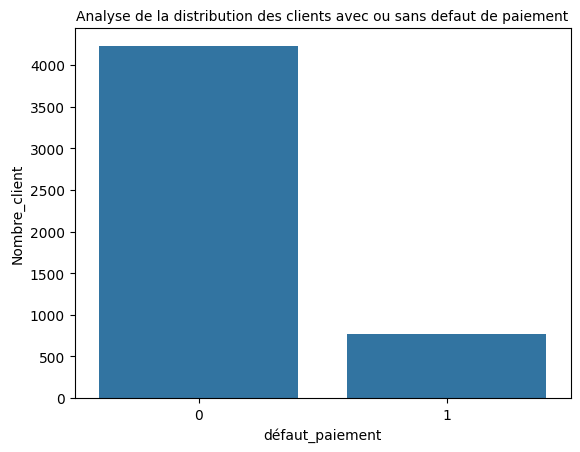

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,
              x='Defaut_Paiement')
plt.title("Analyse de la distribution des clients avec ou sans defaut de paiement", fontsize=10)
plt.xlabel("défaut_paiement")
plt.ylabel("Nombre_client")
plt.show()

* INTERPRETATION :

À travers ce graphique, nous observons clairement une distribution inégale : nous avons près de 4100 clients sans problème de paiement (classe 0), contre seulement environ 600 clients en défaut de paiement (classe 1). Cela représente un déséquilibre significatif, avec les clients en défaut constituant environ
12,7% "(600/(4100+600)≈0.1276 soit 12,7%)" de notre base de données.

Cette observation est cruciale : bien que la majorité de nos clients soient sans problème, le fait que plus de 600 clients aient un défaut de paiement indique une proportion non négligeable de risque. Ceci souligne l'importance capitale d'être vigilant et de développer des outils capables d'identifier précisément ces cas de défaut, car ils représentent un coût financier direct pour l'entreprise.

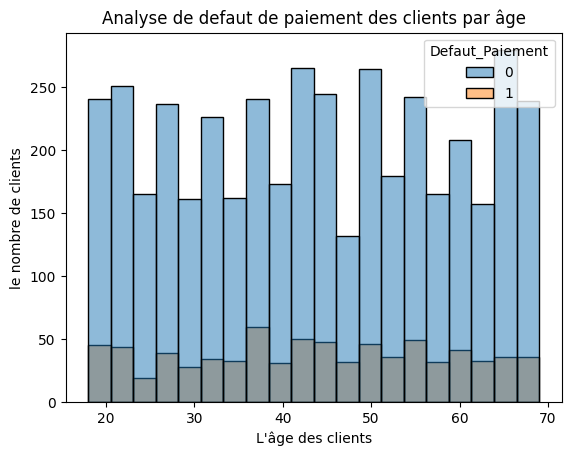

In [ ]:
sns.histplot(data=df,
             x='Age',
             hue='Defaut_Paiement',
             bins=20)
plt.title("Analyse de defaut de paiement des clients par âge", fontsize=12)
plt.xlabel("L'âge des clients")
plt.ylabel("le nombre de clients")
plt.show()

* INTERPRETATION :

Le graphique montre la répartition des défauts de paiement (classe 1) en fonction de l’âge des clients. On observe des variations importantes selon l’âge, ce qui rend difficile une généralisation stricte.

Toutefois, certaines tendances globales avec des exceptions peuvent être identifiées :

Entre 18 et 25 ans, le risque de défaut est globalement élevé, avec un pic autour de 21–23 ans.

À partir de 26 ans jusqu’à environ 38 ans, le risque diminue de manière notable.
Une hausse soudaine du risque est visible à 39 ans, mais elle redescend rapidement à 40 ans.

Entre 41 et 50 ans, on observe une tendance à l’augmentation du risque, même si elle reste modérée.

Entre 51 et 55 ans, le risque diminue à nouveau, puis remonte à 56 ans, baisse vers 60, puis remonte à 61 ans.

Enfin, de 62 à 70 ans, le risque est relativement stable et modéré.

En résumé, bien que la courbe du risque ne soit pas linéaire, certaines tranches d’âge présentent des zones de risque plus marqué, notamment chez les très jeunes adultes et autour de 39, 56 et 61 ans.

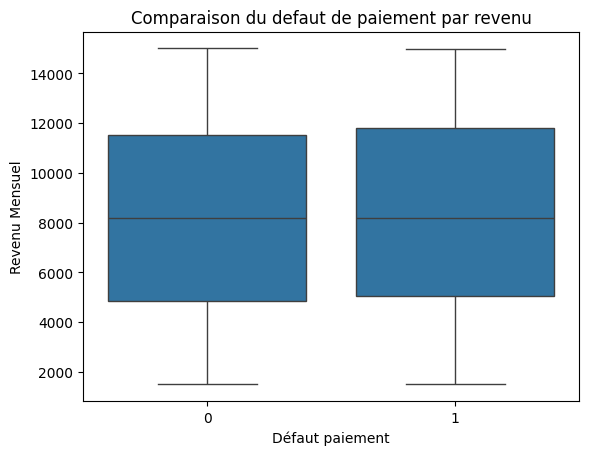

In [ ]:
#Utilisez un boxplot pour visualiser la relation entre 'Defaut_Paiement' et 'Revenu_Mensuel'.
sns.boxplot(data=df,
            x='Defaut_Paiement',
            y='Revenu_Mensuel')
plt.title("Comparaison du defaut de paiement par revenu",fontsize= 12) # Choisir le titre et la taille de la police
plt.xlabel("Défaut paiement")
plt.ylabel("Revenu Mensuel")
plt.show()

* INTREPRETATION :

Ce graphique est un box plot comparant le revenu mensuel des clients en fonction de leur statut de défaut de paiement.
L’axe des abscisses représente la classe de défaut (0 = pas de défaut, 1 = défaut), tandis que l’axe des ordonnées indique le revenu mensuel.

On remarque que les deux groupes (classe 0 et classe 1) ont des revenus très proches :

Médiane autour de 8100 € pour les clients sans défaut (classe 0)

Médiane autour de 8100 € pour les clients avec défaut (classe 1)

Les distributions sont similaires en termes d’étendue (minimum, maximum, quartiles), ce qui suggère que :

Le risque de défaut de paiement ne semble pas fortement corrélé au revenu mensuel.

En d’autres termes, un revenu plus élevé ne garantit pas une meilleure fiabilité de paiement.

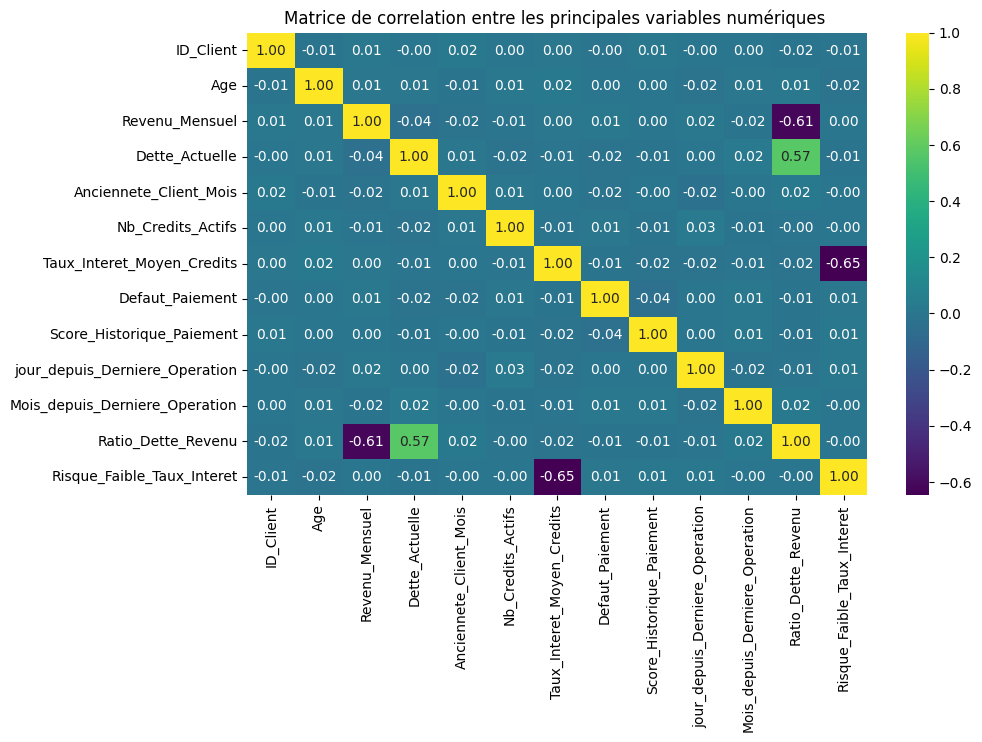

In [ ]:
#Tracez une matrice de corrélation (heatmap) pour les principales variables numériques.
#Identifiez les paires de variables fortement corrélées.
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(numeric_only=True),
            cmap="viridis",annot=True,
            fmt='.2f')
plt.title("Matrice de correlation entre les principales variables numériques ", fontsize=12) # Choisir le titre et la taille de la police
plt.show()

* INTERPRETATION

Ce graphique represente un heatmap comparant la matrice de correlation entre les variables numeriques

La matrice de corrélation révèle que la plupart de nos variables numériques ont des corrélations linéaires très faibles entre elles.

Cependant, nous avons identifié des relations logiques et modérément fortes pour les variables construites :

Le Ratio_Dette_Revenu est :

Fortement corrélé négativement (-0.61) avec le Revenu_Mensuel (logique : plus le revenu est haut, plus le ratio Dette/Revenu est bas).
Positivement corrélé (0.57) avec la Dette_Actuelle (logique : plus la dette est haute, plus le ratio Dette/Revenu est haut). Ces corrélations confirment la pertinence de cette variable composite.
La variable Risque_Faible_Taux_Interet est fortement corrélée négativement (-0.65) avec Taux_Interet_Moyen_Credits, ce qui est également logique étant donné sa construction

Le point le plus crucial est que la variable cible, Defaut_Paiement, ne montre que des corrélations linéaires très faibles (proches de 0) avec toutes les variables numériques. Cela indique qu'un modèle de prédiction du défaut de paiement devra probablement s'appuyer sur des relations non-linéaires et/ou des interactions complexes entre les variables, plutôt que sur de simples relations linéaires.


3. Visualisations Interactives avec Plotly :

In [ ]:
#Importer la libraire plotly
import plotly.express as px
fig=px.histogram(df, x='Anciennete_Client_Mois', #Tracer le histogram pour l'analyse
                 color='Defaut_Paiement',
                 nbins=30,
                 title="Analyse du defaut de paiement par ancienneté",
                 barmode='overlay',          # Mode transparent
                 marginal='box' )            # box marginal
fig.update_layout(bargap=0.1,title_x=0.5)    # Séparer les bars entre eux et centrer le titre
fig.show()

* INTERPRETATION

Ce graphique represente un histogram avec l'ancienneté en abssice et séparer par defaut de paiement

on constate deux classes , (classe 0) ceux qui ont pas de défaut de paiement
(classe 1) ceux qui rencontre des difficulté d paiement

Nous observons que la part des défauts (en rouge) semble plus prononcée dans les premières années d'ancienneté, spécifiquement jusqu'à environ 50 mois (4 ans)

on constate Apres (5 ans) le 60 ème mois d'anciènneté le nombre de client diminue graduellement jusquau 139ème mois soit (11 ans)

Juste après on contate aussi que le nombre de ce type de client augmente jusqu'au 179ème soit 15 ans d'anciènneté mais il se stabilise  la fin pour les plus ancienne

Quelque excpetions malgré tout, un pic de nombre de client classe 1 entre 80 et 89 eme mois soit 8 ans  et un autre entre 220 et 229 eme mois soit 18 et 20 ans

Ces pics isolés de défauts à des anciennetés spécifiques (environ 8 ans et 18-20 ans) sont intéressants et pourraient signaler des points de stress financiers récurrents pour les clients à ces étapes de leur vie ou de leur relation avec la banque. Cela pourrait valoir une exploration plus approfondie sur les événements typiques à ces âges (fin d'études, acquisition immobilière, etc.)."

En conclusion

L'Anciennete_Client_Mois est une variable très pertinente.
"Ces observations soulignent que l'ancienneté du client est une caractéristique clé qui présente des relations non-linéaires avec le risque de défaut.

Puisque nous avons découvert que la relation est non-linéaire (avec des seuils et des pics), cela nous indique que lorsque nous choisirons un modèle, nous devrons privilégier des types de modèles qui sont intrinsèquement capables de gérer ce genre de relations complexes.

In [ ]:
#Transformer et créer nouvelle colonne de type chaine de caractère à partir de la colonne Defaut_Paiement
df['Defaut_Paiement_str']=df['Defaut_Paiement'].astype(str)

#Tracer un barplot
fig=px.bar(df,
           x="Type_Contrat_Pret",
           title ='La repartition du défaut de paiement par type de contrat', #Ajouter un titre
           color ='Defaut_Paiement_str',                                      #Utiliser la colonne "defaut_paiement_str" pour diffirencier les groupes
           barmode='group')
fig.update_layout(title_x=0.5)                                                #Centrer le titre
fig.show()


* INTERPRETATION :

Ce graphique represente un barplot avec 4 types de contrat en abcisse: consommation, immobilier , automobile, renouvelable, groupés a chaque fois en classe client , la première avec défaut de paiement en rouge (classe 1) et classe 0 en bleu, ceux qui n'ont pas de defaut de paiement

On constate que le nombre client avec un défaut de paiement est plus prononcé chez ceux qui prenne un type de contrat consommation et puis vient en 2 ème position le contrat immobilier et ensuite automobile

On constate moins de client classe 1 dans le contrat renouvellable ce qui peut sugguerer que lorsque les clients renuvellent ils presentent moins de risque  dans la gestion de leur prêt

On contate tout de même que la proportion de ceux n'ont pas de défaut de paiement est plus que ceux qui ont

En conclusion
Les deux type de contrat consommation et immobilier présentent un potentiel risque de défaut de paiement ce qui indique et suggère d'avoir plus de vigilance sur le profil du client pour accorder ce type de prêt

# Partie 3 : Modélisation Machine Learning

1.Préparation des Données pour le ML :

Séparez le DataFrame en features (X) et variable cible (y), où y est 'Defaut_Paiement'.
Identifiez clairement les colonnes numériques et les colonnes catégorielles pour le prétraitement à l'aide de select_dtypes.
Divisez les données en ensembles d'entraînement et de test (80% entraînement, 20% test) en utilisant train_test_split. Assurez-vous d'utiliser une stratification pour la variable cible 'Defaut_Paiement' et un random_state.

In [ ]:
# Identifier les colonnes catégorielles
df.select_dtypes(include=['object'])

,Type_Contrat_Pret,Statut_Emploi,Historique_Paiement,Ville,Categorie_Age,Id_facture,Num_Facture_Extrait,Defaut_Paiement_str
0,Consommation,Sans emploi,Excellent,Nice,Senior,INV-NIC-97062-FR,97062,0
1,Consommation,Salarié,Excellent,Marseille,Senior,INV-MAR-73469-FR,73469,0
2,Immobilier,Indépendant,Bon,Toulouse,Senior,INV-TOU-19445-FR,19445,0
3,Consommation,Indépendant,Mauvais,Marseille,Adulte,INV-MAR-56364-FR,56364,0
4,Immobilier,Salarié,Bon,Bordeaux,Senior,INV-BOR-96017-FR,96017,1
...,...,...,...,...,...,...,...,...
4995,Consommation,Salarié,Bon,Bordeaux,jeune,INV-BOR-73636-FR,73636,0
4996,Consommation,Retraité,Mauvais,Paris,Senior,INV-PAR-97384-FR,97384,0
4997,Consommation,Salarié,Moyen,Toulouse,Adulte,INV-TOU-37112-FR,37112,0
4998,Automobile,Indépendant,Moyen,Toulouse,Senior,INV-TOU-33074-FR,33074,0


In [ ]:
#Comprendre les données dans la colonne Ville :
df['Ville'].unique()

array(['Nice', 'Marseille', 'Toulouse', 'Bordeaux', 'Lyon', 'Paris'],
      dtype=object)

In [ ]:
#Identifier les colonnes numerique
df.select_dtypes(include=['number'])

,ID_Client,Age,Revenu_Mensuel,Dette_Actuelle,Anciennete_Client_Mois,Nb_Credits_Actifs,Taux_Interet_Moyen_Credits,Defaut_Paiement,Score_Historique_Paiement,jour_depuis_Derniere_Operation,Mois_depuis_Derniere_Operation,Ratio_Dette_Revenu,Risque_Faible_Taux_Interet
0,1,56,3420.0,41297.0,106.0,0,0.041373,0,4,1011,9,12.075146,1
1,2,69,9317.0,27684.0,100.0,4,0.097556,0,4,313,8,2.971343,0
2,3,46,13183.0,26393.0,92.0,0,0.121410,0,3,1758,8,2.002048,0
3,4,32,12836.0,22754.0,190.0,5,0.124343,0,1,443,3,1.772671,0
4,5,60,3593.0,20799.0,96.0,2,0.047759,1,3,1215,2,5.788756,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,24,12872.0,21996.0,123.0,4,0.049537,0,3,1702,10,1.708825,1
4996,4997,66,7322.0,18161.0,80.0,0,0.047922,0,1,1566,2,2.480333,1
4997,4998,26,13622.0,46022.0,119.0,0,0.090264,0,2,585,11,3.378505,0
4998,4999,53,3572.0,40148.0,26.0,3,0.117445,0,2,867,1,11.239642,0


In [ ]:
#Séparation de feature X et la variable Cible
#X=df.drop(['Defaut_Paiement','ID_Client','Id_facture', 'Num_Facture_Extrait','Defaut_Paiement_str'],axis=1)
#y=df['Defaut_Paiement']

In [ ]:
#Encodage des colonne catégorielle avec get_dummies


In [ ]:
from sklearn.model_selection import train_test_split
# Division des données en ensemble d'entrainement et de test


In [ ]:
#Séparation de feature X et la variable Cible
X=df.drop(['Defaut_Paiement','ID_Client','Id_facture', 'Num_Facture_Extrait','Defaut_Paiement_str'],axis=1,errors='ignore')
y=df['Defaut_Paiement']

In [ ]:
#Vérifier le nombre de valeur maanquantes dans les features
X.isna().sum()

,0
Age,0
Revenu_Mensuel,0
Dette_Actuelle,0
Anciennete_Client_Mois,0
Type_Contrat_Pret,0
Statut_Emploi,0
Nb_Credits_Actifs,0
Taux_Interet_Moyen_Credits,0
Historique_Paiement,0
Ville,0


In [ ]:
# Étape 2 : Remplacer les NaN par 'Inconnu'
X["Categorie_Age"] = X["Categorie_Age"].fillna('Inconnu').astype(str)

In [ ]:
X["Type_Contrat_Pret"].dtype

dtype('O')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Age                             5000 non-null   int64         
 1   Revenu_Mensuel                  5000 non-null   float64       
 2   Dette_Actuelle                  5000 non-null   float64       
 3   Anciennete_Client_Mois          5000 non-null   float64       
 4   Type_Contrat_Pret               5000 non-null   object        
 5   Statut_Emploi                   5000 non-null   object        
 6   Nb_Credits_Actifs               5000 non-null   int64         
 7   Taux_Interet_Moyen_Credits      5000 non-null   float64       
 8   Historique_Paiement             5000 non-null   object        
 9   Ville                           5000 non-null   object        
 10  Categorie_Age                   5000 non-null   object        
 11  Scor

1_REGRESSION LOGISTIC

Predire les clients avec défaut ou sans défaut de paiement

In [ ]:
 from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

# Division des données en ensemble d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Liste des colonnes numériques
numeric_features = X.select_dtypes(include=np.number).columns.tolist()

# Liste des colonnes catégorielles
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Création du ColumnTransformer
preprocessor_clf = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Création du pipeline pour la CLASSIFICATION LOGISTIQUE
pipeline_clf = Pipeline(steps=[
    ("preprocessor", preprocessor_clf),
    ("classifier", LogisticRegression()) # C'est bien LogisticRegression
])

# Entraînement du pipeline ---
print("\nTentative d'entraînement du pipeline...")
pipeline_clf.fit(X_train, y_train) # On entraîne bien le pipeline_clf
print("Entraînement terminé avec succès !")



Tentative d'entraînement du pipeline...
Entraînement terminé avec succès !


In [ ]:
# Évaluation du modèle
y_pred=pipeline_clf.predict(X_test)

In [ ]:
# Évaluation du modèle
y_pred=pipeline_clf.predict(X_test)
#calculer laccuracy de test
print(f"l'accuracy test du model est : {accuracy_score(y_test,y_pred):.2f}")

l'accuracy test du model est : 0.85


*Interprétation de l'Accuracy de Test (0.85)

Signification directe :

ce modèle de classification est capable de prédire correctement si un client va être en défaut de paiement ou non dans 85% des cas sur un ensemble de données qu'il n'a jamais vu auparavant (l'ensemble de test).
Cela indique que le modèle a une bonne capacité à distinguer les clients à risque des clients sans risque.

In [ ]:
y_pred_train=pipeline_clf.predict(X_train)
#calculer laccuracy d'entrainement
print(f"l'accuracy entrainement du model est : {accuracy_score(y_train,y_pred_train):.2f}")

l'accuracy entrainement du model est : 0.85


L'Accuracy_test est la même que celle de l'accuarcy train ce qui indique que pas de overfitting et que le model géneralise bien
En conclusion simple : Ce modèle avec 85% d'accuracy de test est un bon indicateur de sa capacité à prédire si un client fera défaut ou non, ce qui est très utile pour la prise de décision de la banque.

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92       846
           1       0.00      0.00      0.00       154

    accuracy                           0.85      1000
   macro avg       0.42      0.50      0.46      1000
weighted avg       0.72      0.85      0.78      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Analyse u classification report :

ce model arrive à prédire à 85 % sur le client sans défaut" : C'est ce que le recall de 1.00 pour la classe 0, combiné à l'accuracy globale de 0.85, indique. Le modèle est très bon pour identifier les non-défaillants.

mais il arrive pas avec ceux avec défaut" : Le recall de 0.00 et la precision de 0.00 pour la classe 1 (défaut) montrent qu'il ne parvient absolument pas à identifier les clients qui feront défaut.

"donc le model à état actuel, pour l'objectif de la banque d'identifier les clients en défaut n'est PAS fiable du tout.

Je rajouterai la ponderation des classe au model (Class Weighting="balanced") : pour dire au modèle que les erreurs sur la classe 1 (défaut) sont plus "chères" que les erreurs sur la classe 0

In [ ]:
# Création du pipeline pour la CLASSIFICATION LOGISTIQUE avec class weight, ponderation des classes
pipeline_classe=Pipeline(steps=[("preprocessor",preprocessor_clf),
                             ("classifier",LogisticRegression(class_weight="balanced"))])
pipeline_classe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Revenu_Mensuel',
                                                   'Dette_Actuelle',
                                                   'Anciennete_Client_Mois',
                                                   'Nb_Credits_Actifs',
                                                   'Taux_Interet_Moyen_Credits',
                                                   'Score_Historique_Paiement',
                                                   'jour_depuis_Derniere_Operation',
                                                   'Mois_depuis_Derniere_Operation',
                                                   'Ratio_Dette_Revenu',
                                                   'Risque_Faible_Taux_Interet']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type_Contrat_Pret',
                                                   'Statut_Emploi',
                                                   'Historique_Paiement',
                                                   'Ville', 'Categorie_Age',
                                                   'Anciennete_Client_Quartiles'])])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [ ]:
#Evaluer le model avec la ponderation des classes
y_pred_classe=pipeline_classe.predict(X_test)
print(classification_report(y_test,y_pred_classe))

              precision    recall  f1-score   support

           0       0.84      0.56      0.67       846
           1       0.15      0.42      0.22       154

    accuracy                           0.54      1000
   macro avg       0.50      0.49      0.45      1000
weighted avg       0.73      0.54      0.60      1000



Interpretation :

Le model s'est amélioré Mais ce n'est pas suffisant , Il est précis à seulement 15 % sur le client a
vec défaut, donc le modèle n'est pas fiable et on peut accorder des prêts à des clients qui présentent des risques
Cela signifie que quand le modèle lève une alerte et dit "Attention, ce client est à risque !",
il se trompe 85% du temps. C'est un trop grand nombre de "fausses alarmes" ou de "faux positifs".
Le danger pour la banque est que, si elle se fie à ce modèle pour identifier les risques, elle recevra beaucoup
de fausses alertes, ce qui peut rendre le système inefficace ou, pire, la pousser à accorder des prêts
à des clients réellement risqués que le modèle n'aura pas correctement identifiés (les vrais "défauts"
qu'il aura classés comme "pas de défaut" – cela est lié au rappel de la classe 0 qui n'est que de 56%.

In [ ]:
display(confusion_matrix(y_test,y_pred_classe))

array([[473, 373],
       [ 89,  65]])

Tester le model sur un client qui présente un risque pour nous

In [ ]:
#Définir le nouveau client a tester
client_propect=df.iloc[[5]]
X_prospect=client_propect.drop(['Defaut_Paiement','ID_Client','Id_facture','Num_Facture_Extrait','Defaut_Paiement_str'],axis=1)


In [ ]:
y_pred_status=pipeline_classe.predict(X_prospect)

In [ ]:
print(f"Le modèle prédit le statut de défaut du client prospect : {y_pred_status[0]}")

if y_pred_status ==0:
  print("ce client ne presente au risque, un crédit peut être octroyé")
else:
  print("ce client peut présenter au risque, pas de crédit")

Le modèle prédit le statut de défaut du client prospect : 0
ce client ne presente au risque, un crédit peut être octroyé


2_REGRESSION LINEAR

Prédire quel taux intérêt octroyer pour les nouveaux clients :

In [ ]:
X_reg=df.drop(['Taux_Interet_Moyen_Credits','ID_Client','Id_facture','Num_Facture_Extrait','Defaut_Paiement_str'],axis=1)
y_reg=df['Taux_Interet_Moyen_Credits']

In [ ]:
X_train_reg,X_test_reg,y_train_reg,y_test_reg=train_test_split(X_reg,y_reg,random_state=42,test_size=0.20)

In [ ]:
preprocessor_reg=ColumnTransformer(transformers=[('num',StandardScaler(),X_reg.select_dtypes(include=np.number).columns.tolist()),
                                                 ("cat",OneHotEncoder(handle_unknown='ignore'),X_reg.select_dtypes(include=['object','category']).columns.tolist())])


In [ ]:
pipeline_reg=Pipeline(steps=[("preprocessor_reg",preprocessor_reg),
                             ("reg",LinearRegression())])

In [ ]:
pipeline_reg.fit(X_train_reg,y_train_reg)

Pipeline(steps=[('preprocessor_reg',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Revenu_Mensuel',
                                                   'Dette_Actuelle',
                                                   'Anciennete_Client_Mois',
                                                   'Nb_Credits_Actifs',
                                                   'Defaut_Paiement',
                                                   'Score_Historique_Paiement',
                                                   'jour_depuis_Derniere_Operation',
                                                   'Mois_depuis_Derniere_Operation',
                                                   'Ratio_Dette_Revenu',
                                                   'Risque_Faible_Taux_Interet']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type_Contrat_Pret',
                                                   'Statut_Emploi',
                                                   'Historique_Paiement',
                                                   'Ville', 'Categorie_Age',
                                                   'Anciennete_Client_Quartiles'])])),
                ('reg', LinearRegression())])

In [ ]:
# Prédictions sur l'ensemble de test pour la régression
y_pred_reg=pipeline_reg.predict(X_test_reg)

In [ ]:
#Calcul du R2 score sur l'ensemble de test
r2_score(y_test,y_pred_reg)

-0.028993177116468427

In [ ]:
# Prédictions sur l'ensemble d'entraînement pour la régression
y_pred_train_reg=pipeline_reg.predict(X_train_reg)
#Calcul du R2 score sur l'ensemble d'entraînement
r2_score(y_train_reg,y_pred_train_reg)

0.4239367993237193

Interpretation

D'après le r2 score de l'ensemble d'entrainement et de test , on constate ce model explique seuelement -0.028 de la variance de la cible taux interet moyen de credit , ce qui indique que le model est mauvais pour prédire cette variable ceci indique aussi que la relation est non linear entre les features choisi et la cible

on constate aussi que le r2 score d'entraienement est faible aussi 0.42, ce qui veut dire que le model a 42 % de la proportion de variance de la cible, et en comparaison avec le r2 score de test , ceci suggère un underfitting

La prochaine étape sera de changer features ou de model

Modélisation - K-Nearest Neighbors (KNN Classifier) :

Contexte : Maintenant, pour la prédiction directe du défaut de paiement.
Créez un Pipeline qui inclut le ColumnTransformer et un modèle KNeighborsClassifier (choisissez un n_neighbors initial, par exemple 5).
Entraînez le modèle sur les données d'entraînement.
Faites des prédictions sur l'ensemble de test.
Évaluez la performance du modèle en générant un classification_report (précision, rappel, F1-score) et une confusion_matrix.
Interprétez les résultats de la matrice de confusion : Qu'est-ce que les faux positifs et les faux négatifs signifient dans le contexte du risque de crédit bancaire, et lequel est le plus critique pour une banque ?
Analyse et Recommandations :

Sur la base de tes analyses et des performances des modèles, quelles sont les 3 caractéristiques (features) les plus importantes qui semblent influencer le risque de défaut de paiement ? Justifiez.
Quelles recommandations concrètes donneriez-vous à la banque pour améliorer sa gestion du risque de crédit, basées sur les insights de ce projet ?

Analyse et Recommandations :

Sur la base de tes analyses et des performances des modèles, quelles sont les 3 caractéristiques (features) les plus importantes qui semblent influencer le risque de défaut de paiement ? Justifiez.
Quelles recommandations concrètes donneriez-vous à la banque pour améliorer sa gestion du risque de crédit, basées sur les insights de ce projet ?



In [ ]:
#Acceder à l'étape du model de regression dans le pipeline
model_rlog=pipeline_classe.named_steps["classifier"]
#Calculer les coeff et intercept sur la regression logistic
#coefficient=model_rlog.coef_[0]
coefficients = model_rlog.coef_[0]

In [ ]:
#Obtenir le noms de colmomns apres un pipeline
name_columns= pipeline_classe.named_steps['preprocessor'].get_feature_names_out()

In [ ]:
#créer un dataframe avec les coefficient qui impact defaut paiement
coeffs=pd.DataFrame({"coeficient":coefficients,"features":name_columns})

In [ ]:
#Calculer la valeur absolue pour trier
coeffs['coeficient_abs']=abs(coeffs['coeficient'])

In [ ]:
# Identifier les 4 premier caracteristique qui ont plus d'impact sur le defaut paiement cleint
coeffs.sort_values(by="coeficient_abs",ascending=False).head(4)

,coeficient,features,coeficient_abs
37,-0.564039,cat__Anciennete_Client_Quartiles_prospect,0.564039
33,-0.296684,cat__Categorie_Age_jeune,0.296684
29,0.247294,cat__Ville_Toulouse,0.247294
36,0.242333,cat__Anciennete_Client_Quartiles_pilier,0.242333


# Analyse et Recommandations :

Sur la base des analyses de votre modèle de régression logistique, voici les 3 caractéristiques (features) les plus importantes qui semblent influencer le risque de défaut de paiement, avec leur justification :

1. cat__Anciennete_Client_Quartiles_prospect

    Coefficient : -0.564039
    Justification : Cette caractéristique présente le coefficient le plus élevé en valeur absolue (-0.564), ce qui en fait la plus influente. Son signe négatif indique que la catégorie "prospect" (probablement désignant les clients les plus récents ou avec peu d'ancienneté) est associée à une diminution significative du risque de défaut de paiement par rapport à la catégorie de référence (qui a été "dropée" par drop_first=True).
    Interprétation : Cela pourrait suggérer que les "prospects" (nouveaux clients) sont peut-être soumis à des critères d'évaluation plus stricts au départ, ou qu'ils représentent un segment moins risqué pour d'autres raisons, ou que la catégorie de référence est en fait la plus risquée. Il est crucial de savoir quelle catégorie a été supprimée par drop_first=True pour une interprétation complète (par exemple, si la catégorie de référence était "ancien" ou "très ancien", cela signifierait que ces derniers sont plus risqués).

2. cat__Categorie_Age_jeune

    Coefficient : -0.296684
    Justification : Avec un coefficient négatif de -0.296, c'est la deuxième caractéristique la plus importante en valeur absolue. Son signe négatif indique que l'appartenance à la catégorie d'âge "jeune" est associée à une diminution du risque de défaut de paiement par rapport à la catégorie d'âge de référence.
    Interprétation : Contrairement à certaines intuitions, cela pourrait signifier que les jeunes clients (évalués par votre modèle) sont moins enclins au défaut de paiement que la tranche d'âge de référence. Cela pourrait être dû à un meilleur suivi des jeunes clients par la banque, à des montants de prêts généralement plus faibles, ou à une population "jeune" spécifique dans votre dataset.

3. cat__Ville_Toulouse

    Coefficient : 0.247294
    Justification : Avec un coefficient positif de 0.247, c'est la troisième caractéristique la plus influente. Son signe positif indique que résider à "Toulouse" est associé à une augmentation du risque de défaut de paiement par rapport à la ville de référence.
    Interprétation : Cette corrélation peut être due à des facteurs socio-économiques spécifiques à Toulouse (taux de chômage, coût de la vie, type d'emplois prédominants, etc.) qui n'auraient pas été capturés par d'autres variables. Cela mérite une investigation plus approfondie pour comprendre les raisons sous-jacentes.

#Recommandations concrètes pour la banque pour améliorer sa gestion du risque de crédit :

Basées sur ces insights et les pratiques générales en gestion du risque :

Réévaluer les critères d'évaluation de l'ancienneté client :
Action : Examiner en détail pourquoi la catégorie "prospect" semble moins risquée que la catégorie de référence. Si c'est dû à des critères de sélection initiale très stricts pour les nouveaux clients, la banque peut envisager d'appliquer des filtres similaires ou d'améliorer le suivi des clients plus anciens (la catégorie de référence).
Bénéfice : Optimiser l'allocation des ressources et affiner les stratégies fidélisation en fonction du risque réel associé à l'ancienneté.

Affiner le ciblage par âge et personnaliser les offres :
Action : Puisque la catégorie "jeune" semble moins risquée, la banque pourrait développer des offres de crédit spécifiquement adaptées à cette tranche d'âge (par exemple, des prêts étudiants, premiers prêts immobiliers avec des conditions avantageuses) tout en maintenant une surveillance adéquate. Pour la catégorie d'âge de référence (celle qui semble plus risquée), la banque devrait renforcer son évaluation et son suivi.
Bénéfice : Attirer et sécuriser une clientèle "jeune" potentiellement sous-estimée en termes de risque, tout en gérant plus proactivement le risque des tranches d'âge plus vulnérables.

Analyser les risques géographiques et adapter les stratégies
Action : Mener une analyse approfondie des facteurs économiques et démographiques spécifiques à Toulouse (ou aux villes à risque identifié) qui pourraient expliquer le risque de défaut plus élevé. Cela pourrait inclure des études de marché locales, des partenéristiques avec des agences d'emploi ou des organismes sociaux locaux. La banque pourrait ajuster ses politiques de prêt pour cette zone (taux, garanties, montants maximums).
Bénéfice : Réduire l'exposition aux zones géographiques à risque élevé et mettre en place des stratégies de mitigation spécifiques, tout en étant plus compétitive dans les zones à faible risque.
